## Implementing Machine Learning using Neural Network (w/o any scify libraries)


I have already learned the basics of Machine Learning and implemented topics like Linear/Logistic Regression and Neural Network in the Matlab programming language. But implementing the same algorithms using Python and Numpy is a little difficult for me and maybe for some other people as well.

So here I am writing a very simple neural network for a very simple Iris dataset, especially for beginners.

Any kind of comments are welcome, Thanks!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import warnings # filter warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualisation
from matplotlib import pyplot as plt # for data visualisation

# crazy thing, to show graph in between cells
%matplotlib inline 

warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(['ls', '../input']).decode('utf8'))

# Any results you write to the current directory are saved as output.

Iris.csv
database.sqlite



### Load Data

In [2]:
# load Iris data
data = pd.read_csv('../input/Iris.csv')
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,127,6.2,2.8,4.8,1.8,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Visualise

One thing is very clear from the below graph is that the features of Versicolor and Verginica are very similar since they overlap in most of the places but the features of setosa are different form the other two.

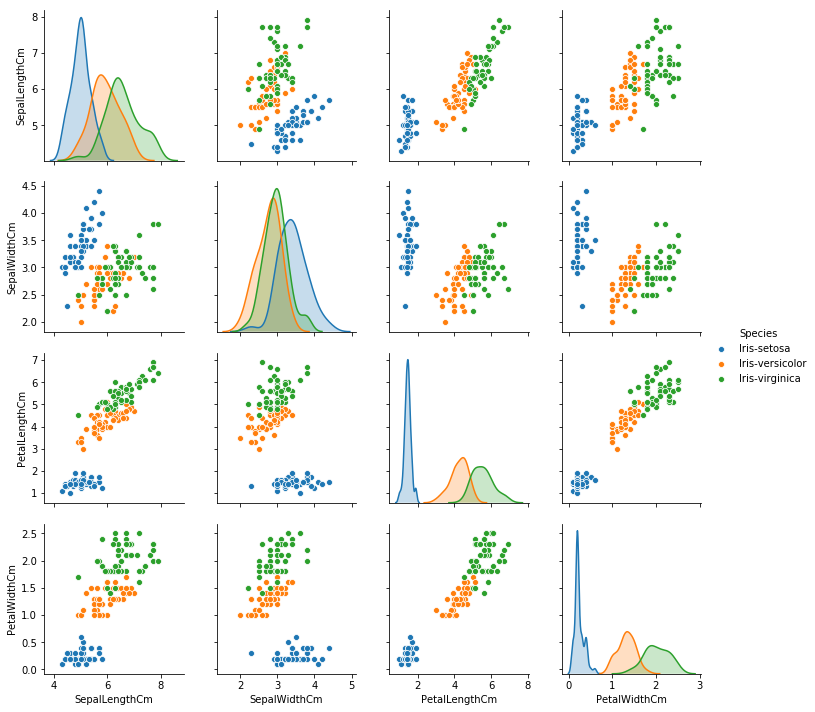

In [5]:
# pair-plot of Iris dataset
sns.pairplot(data=data, vars=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'), hue='Species')

### Normalizing Data

In layman term, we do normalization to improve the overall performance of the model by minimizing the features values in the range between 0 to 1. You can read little more about normalization [here](https://stats.stackexchange.com/a/70807/241387).

In [6]:
df_norm  = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].apply(lambda x: (x - x.min())/(x.max() - x.min()))

> *Since, our data is normalised, now if we call the **`describe`** method on our dataset, we can see the **`min`** value for all column is **`0`** and **`max`** value for all column is **`1`**.*

In [7]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


> ***Now let's map the species name to some unique number for easy calculations*.**

In [8]:
df_target = data['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])
df_target.sample(n=5)

39     0
56     1
68     1
139    2
79     1
Name: Species, dtype: int64

In [9]:
# Concating both the features and Output value
df = pd.concat([df_norm, df_target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,0.166667,0.416667,0.067797,0.041667,0
58,0.638889,0.375000,0.610169,0.500000,1
40,0.194444,0.625000,0.050847,0.083333,0
104,0.611111,0.416667,0.813559,0.875000,2
76,0.694444,0.333333,0.644068,0.541667,1


### Let's seperate some data for testing purpose

We will test out model on unseen data.

In [10]:
np.random.seed(9)
mask = np.random.rand(len(df)) < 0.8

df_train = df[mask]
df_test = df[~mask]

In [11]:
print("Length of training data : %s" % (len(df_train)))
df_train.sample(n=5)

Length of training data : 119


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,0.333333,0.166667,0.457627,0.375000,1
53,0.333333,0.125000,0.508475,0.500000,1
130,0.861111,0.333333,0.864407,0.750000,2
136,0.555556,0.583333,0.779661,0.958333,2
143,0.694444,0.500000,0.830508,0.916667,2


In [12]:
print("Length of training data : %s" % (len(df_test)))
df_test.sample(n=5)

Length of training data : 31


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
62,0.472222,0.083333,0.508475,0.375000,1
149,0.444444,0.416667,0.694915,0.708333,2
135,0.944444,0.416667,0.864407,0.916667,2
141,0.722222,0.458333,0.694915,0.916667,2
11,0.138889,0.583333,0.101695,0.041667,0


> **Now that we have our training dataset ready,we can now get out `input` as `X` and `output` as `y` value from our dataset to train our model**.

In [13]:
X = df_train.values[:,:4]
print(X[:5])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [14]:
targets = [[1,0,0], [0,1,0], [0,0,1]]
y = np.array([targets[int(x)] for x in df_train.values[:,4]])
print(y[:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


## Backpropogating Neural Network

**The neural network that we will create will have 3 layers:**
* Input Layer
* Hidden Layer
* Output Layer


1. **Input Layer**: This layer will consist of 4 nodes as we have 4 features Sepal Length, Sepal Width, Petal Length, PetalWidth.
2. **Output Layer**: This layer will consist of 3 nodes as we have to classify between 3 outputs only. So if the value of output layer is 1,0,0 that means the prediction is Iris-setosa or if the output value is 0,1,0 then prediction will be Iris-versicolor.

> `w1` will be a matrix that contains the weights of each connecting layer between Input nodes and Hidden nodes. The values of weights will range from -1 to 1 with an overall mean of 0.

In [15]:
hidden_layer_nodes = 5
input_layer_nodes = len(X[0])

w1 = 2 * np.random.random((input_layer_nodes, hidden_layer_nodes)) - 1
print(w1)

[[ 0.09800998 -0.411131    0.6123064  -0.32464679 -0.7579412 ]
 [-0.08880493 -0.50023667  0.49046621  0.47184009 -0.97959029]
 [-0.99401606  0.83601284 -0.35424988 -0.40724191 -0.45814772]
 [-0.50855211  0.55073862 -0.47352304  0.43797423  0.34657755]]


> `w2` will be the weights of connection between the hidden layer and output layer. This will also has the same property same as `w1`.

In [16]:
output_layer_nodes = len(y[0])
w2 = 2 * np.random.random((hidden_layer_nodes, output_layer_nodes)) - 1
print(w2)

[[ 0.10106759  0.36554605 -0.65193415]
 [-0.07096386 -0.01208218 -0.94517746]
 [-0.56352332  0.86681764  0.31728857]
 [ 0.95732498 -0.26137192  0.52478076]
 [ 0.19933032  0.20418479 -0.77338472]]


## Train the network by updating weights using Back Propagation Algorithm

The two main important parts of traning our neural network is:
1. Forward Propagation
2. Back Propagation


#### Forward Propagation ( use current weights to caluculate output ):
* In Forward Propogation, we calculate the values of nodes present in the hidden layer using the weight matix (w1) and input nodes and then calculating the value of output nodes using the hidden layer nodes and weight matrix (w2).

#### Backpropagation ( update network weights ):
* As per my views, I think this is the core of neural network since under this section we update the weight matrix based on the error using gradient discent. After we calculate the output using feed forward network, we will calculate the error in this layer by subtracting the actual output and predicted output and then we will adjust our weight matrix to minimize the error.

<img src="https://i.imgur.com/8PejebM.png" alt="Neural Network" style="width:600px"/>

### Activation Fucntion

In this netwok, we will be using the Sigmoid Activation function. But there are many other activation that you can use. The purpose of activation function is to squash the any value in the range between 0 and 1. We do this to bring non-leniarity in our model so that it can learn more complex function instead of just linear function.

For your learning about activation function, here are the links to [video](https://www.youtube.com/watch?v=NkOv_k7r6no) or [reading](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f).


In [17]:
# Sigmoid Function Defination
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

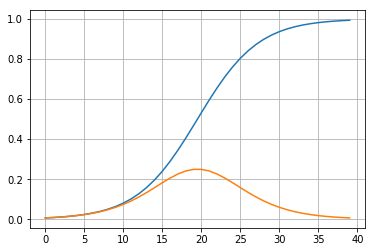

In [18]:
_x = np.linspace(-5, 5, 40)
plt.plot(sigmoid(_x))
plt.plot(sigmoid_derivative(sigmoid(_x)))
plt.grid()

In [19]:
# Now, let's write something serious, are you ready?
learning_rate = 0.01

# To keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to tarin a network using input data
for itr in range(2000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(X, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(X.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.006627397910934265


#### Let' see how the value of error decreases with time

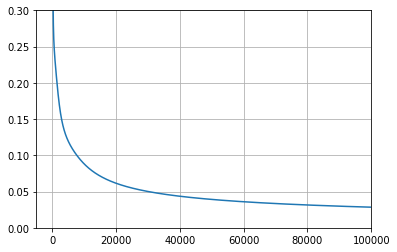

In [20]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.grid()

### Test the accuracy of our model
Here we will run the model with the updated weights on our testing data

In [21]:
X = df_test.values[:,:4]
y = np.array([targets[int(x)] for x in df_test.values[:,4:5]])


l1 = sigmoid(np.dot(X, w1))
l2 = sigmoid(np.dot(l1, w2))

# Let's round off the values in l2 to 3 decimal place
np.round(l2, 3)

array([[0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.001, 0.   ],
       [0.999, 0.053, 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.004, 1.   , 0.   ],
       [0.002, 1.   , 0.   ],
       [0.   , 0.005, 0.996],
       [0.   , 0.   , 1.   ],
       [0.001, 0.007, 0.995],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 1.   ],
       [0.001, 0.449, 0.58 ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.006, 0.995],
       [0.   , 0.09 , 0.921],
       [0.   , 0.155, 0.854],
       [0.   , 0.142, 0.857],
       [0.   , 0.177, 0.836],
       [0.   , 0.101, 0.903],
       [0.   , 0.004, 0.997],
       [0.   , 0.019, 0.986]])

Now, we will get he maximum value from each row and compare that with the actual output.

In [22]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 30 are predicted correctly with an accuracy of 96.774
